# Perform Career Analysis of a Renowned Football Player


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [7]:
gs=pd.read_csv('C:\\Data Science Project\\goalscorers.csv') #goalscoresrs dataset
res=pd.read_csv('C:\\Data Science Project\\results.csv') #results dataset
shoot=pd.read_csv('C:\\Data Science Project\\shootouts.csv') #shootouts dataset

## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [8]:
gs.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [5]:
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [6]:
shoot.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [9]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44350 entries, 0 to 44349
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44350 non-null  object 
 1   home_team  44350 non-null  object 
 2   away_team  44350 non-null  object 
 3   team       44350 non-null  object 
 4   scorer     44301 non-null  object 
 5   minute     44091 non-null  float64
 6   own_goal   44350 non-null  bool   
 7   penalty    44350 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [10]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47399 non-null  object 
 1   home_team   47399 non-null  object 
 2   away_team   47399 non-null  object 
 3   home_score  47396 non-null  float64
 4   away_score  47396 non-null  float64
 5   tournament  47399 non-null  object 
 6   city        47399 non-null  object 
 7   country     47399 non-null  object 
 8   neutral     47399 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [11]:
shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           643 non-null    object
 1   home_team      643 non-null    object
 2   away_team      643 non-null    object
 3   winner         643 non-null    object
 4   first_shooter  229 non-null    object
dtypes: object(5)
memory usage: 25.2+ KB


In [15]:
gs.shape

(44350, 8)

In [16]:
res.shape

(47399, 9)

In [17]:
shoot.shape

(643, 5)

In [18]:
gs.describe()

,minute
count,44091.000000
mean,50.011068
std,26.355009
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [19]:
res.describe()

,home_score,away_score
count,47396.000000,47396.000000
mean,1.759790,1.182927
std,1.775145,1.401625
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [20]:
shoot.describe()

,date,home_team,away_team,winner,first_shooter
count,643,643,643,643,229
unique,566,181,189,175,87
top,2024-03-26,South Africa,Egypt,Argentina,Colombia
freq,5,18,15,15,11


# EDA Data Cleaning Dataframe

In [28]:
# Check for missing values
print(gs.isnull().sum())
print(res.isnull().sum())
print(shoot.isnull().sum())

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64
date          0
home_team     0
away_team     0
home_score    3
away_score    3
tournament    0
city          0
country       0
neutral       0
dtype: int64
date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64


In [34]:
# Check for missing values
print(gs.isnull().sum())
print(res.isnull().sum())
print(shoot.isnull().sum())

# Drop rows with missing 'scorer' or 'minute' values in gs 
gs = gs.dropna(subset=['scorer', 'minute'])

# results_df.fillna(value={'column_name': 'placeholder_value'}, inplace=True)
# shoot.fillna(shoot.mean(), inplace=True)


date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64
date          0
home_team     0
away_team     0
home_score    3
away_score    3
tournament    0
city          0
country       0
neutral       0
dtype: int64
date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64


In [37]:
# Convert 'date' columns to datetime format
gs['date'] = pd.to_datetime(gs['date'])
res['date'] = pd.to_datetime(res['date'])
shoot['date'] = pd.to_datetime(shoot['date'])

# Ensure boolean columns are of boolean type
gs['own_goal'] = gs['own_goal'].astype(bool)
gs['penalty'] = gs['penalty'].astype(bool)

scorer
Cristiano Ronaldo     108
Robert Lewandowski     63
Romelu Lukaku          60
Harry Kane             57
Lionel Messi           55
Name: count, dtype: int64


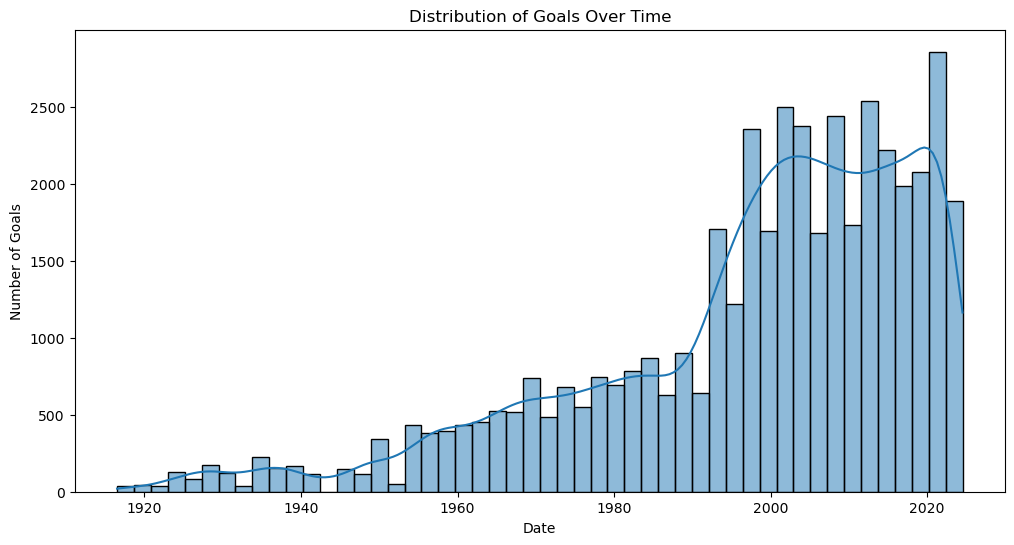

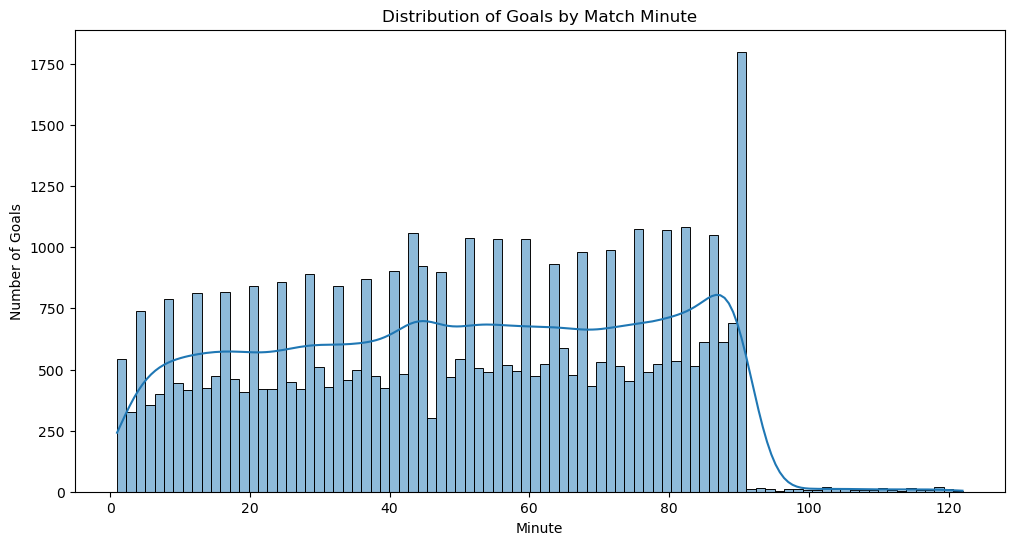

In [38]:
# Total number of goals by each player
total_goals_by_player = gs['scorer'].value_counts()
print(total_goals_by_player.head())

# Plot the distribution of goals over time
plt.figure(figsize=(12, 6))
sns.histplot(gs['date'], bins=50, kde=True)
plt.title('Distribution of Goals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.show()

# Goals by minute
plt.figure(figsize=(12, 6))
sns.histplot(gs['minute'], bins=90, kde=True)
plt.title('Distribution of Goals by Match Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.show()


date
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2020     347
2021    1115
2022     969
2023    1054
2024     608
Name: count, Length: 153, dtype: int64


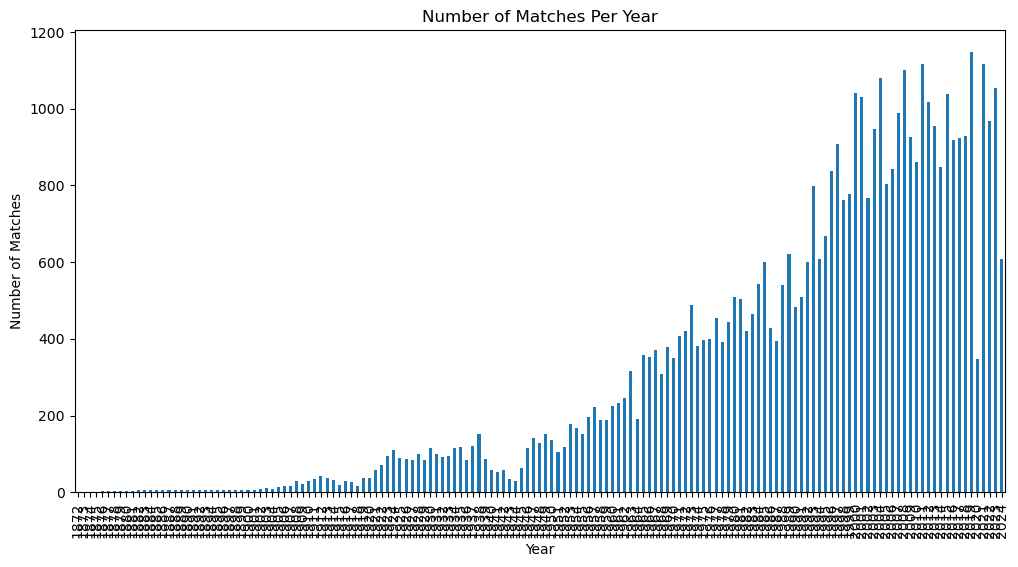

In [39]:
# Number of matches per year
matches_per_year = res['date'].dt.year.value_counts().sort_index()
print(matches_per_year)

# Plot the number of matches per year
plt.figure(figsize=(12, 6))
matches_per_year.plot(kind='bar')
plt.title('Number of Matches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


winner
Argentina      15
South Korea    15
Egypt          14
Zambia         14
Thailand       13
               ..
Corsica         1
Menorca         1
Saint Lucia     1
Sealand         1
Estonia         1
Name: count, Length: 175, dtype: int64


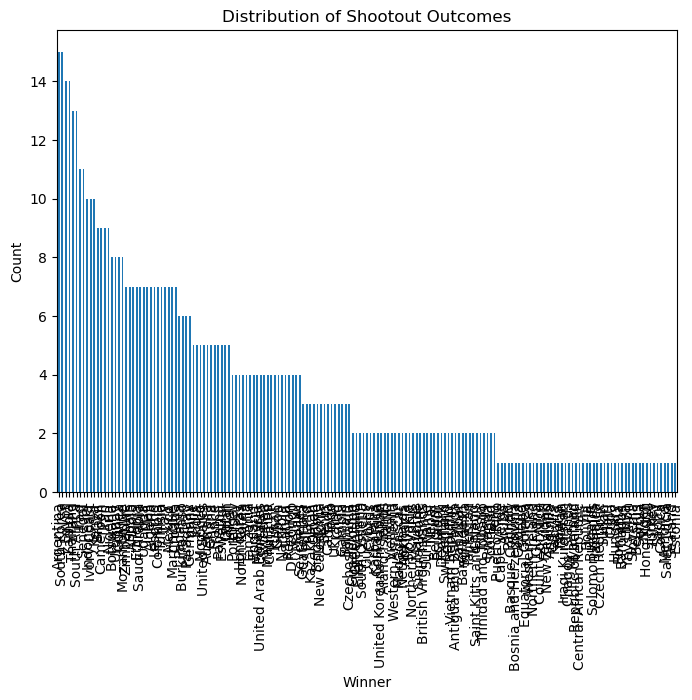

In [69]:
# Distribution of shootout outcomes based on the 'winner' column
shootout_outcomes = shoot['winner'].value_counts()
print(shootout_outcomes)

# Plot shootout outcomes
plt.figure(figsize=(8, 6))
shootout_outcomes.plot(kind='bar')
plt.title('Distribution of Shootout Outcomes')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()


# Data Visualization

 # Goalscorers Data
 ## 1 Total Number of Goals by Each Player


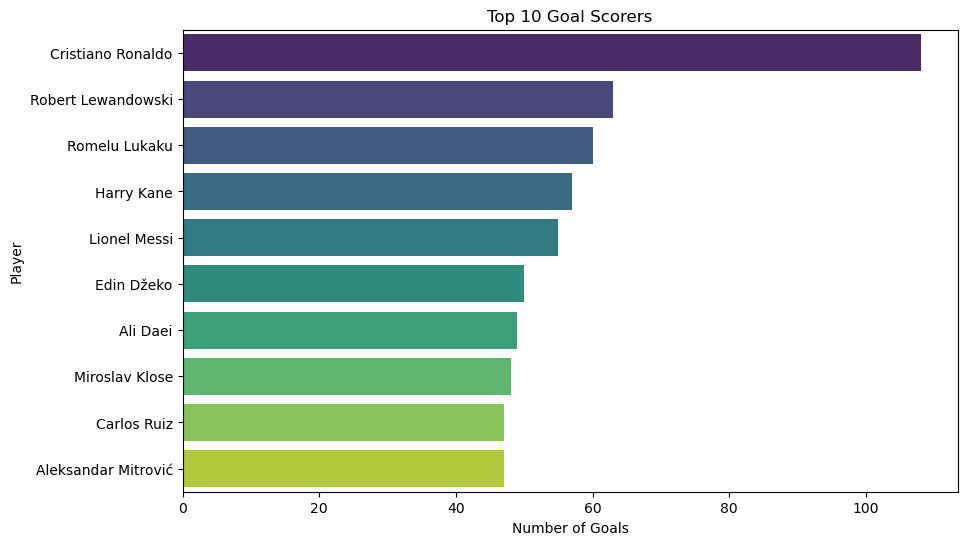

In [70]:
total_goals_by_player = gs['scorer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_goals_by_player.values, y=total_goals_by_player.index, palette='viridis')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Number of Goals')
plt.ylabel('Player')
plt.show()


# 2 Distribution of Goals Over Time

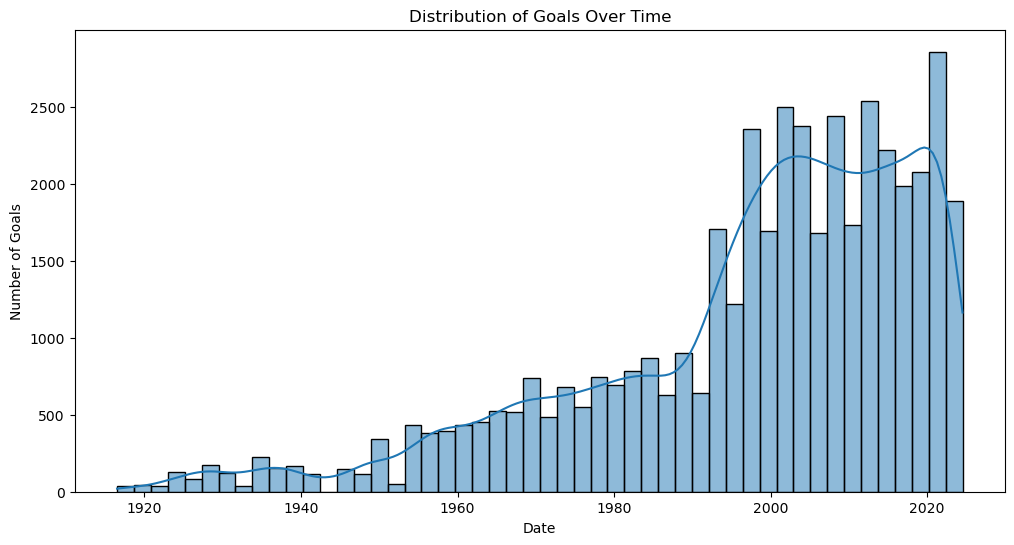

In [71]:
gs['date'] = pd.to_datetime(gs['date'])
plt.figure(figsize=(12, 6))
sns.histplot(gs['date'], bins=50, kde=True)
plt.title('Distribution of Goals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.show()


# 3 Goals by Match Minute


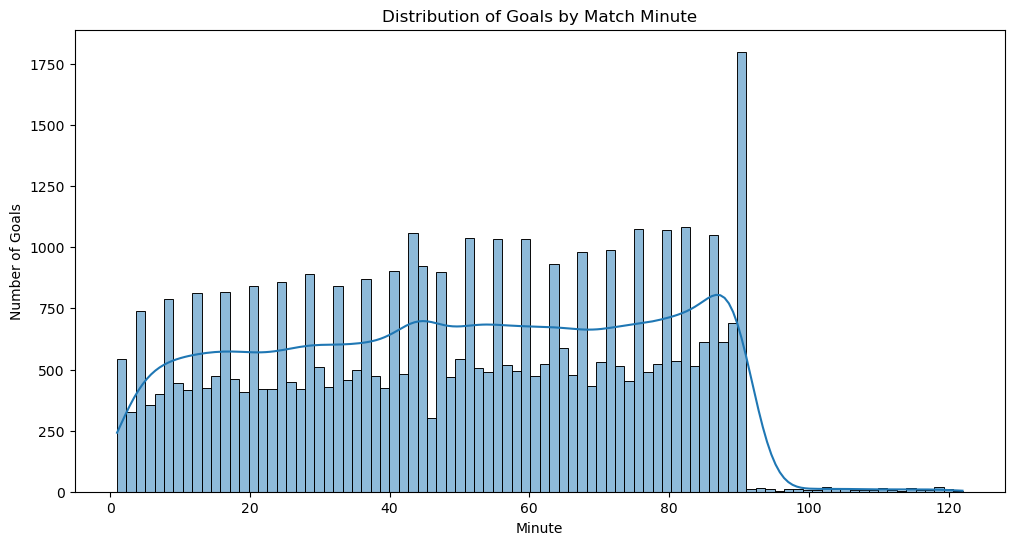

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(gs['minute'], bins=90, kde=True)
plt.title('Distribution of Goals by Match Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.show()


# Results Data
## 1 Number of Matches Per Year

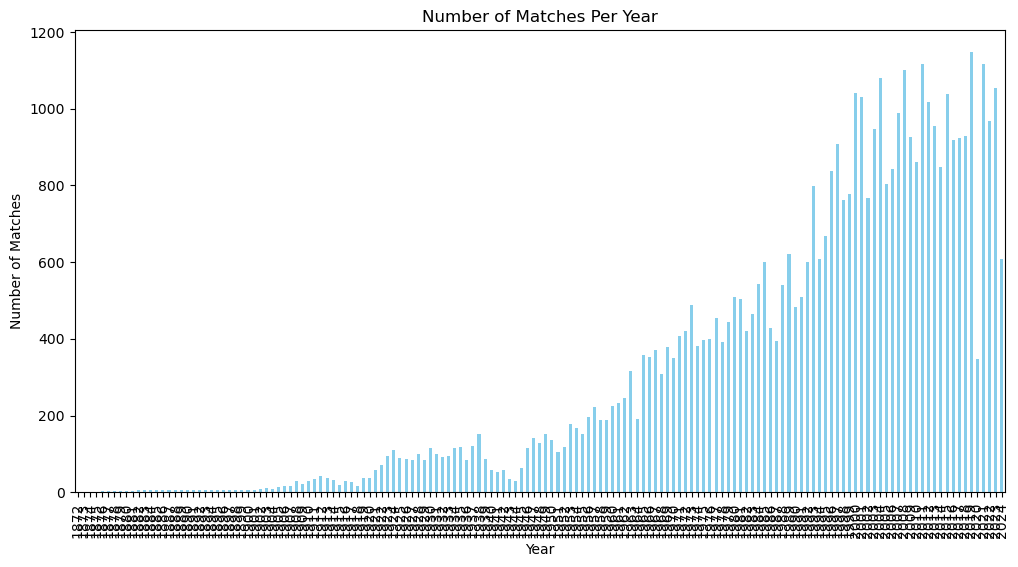

In [73]:
res['date'] = pd.to_datetime(res['date'])
matches_per_year = res['date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
matches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


# 2 Match Outcomes (Home Wins, Away Wins, Draws)


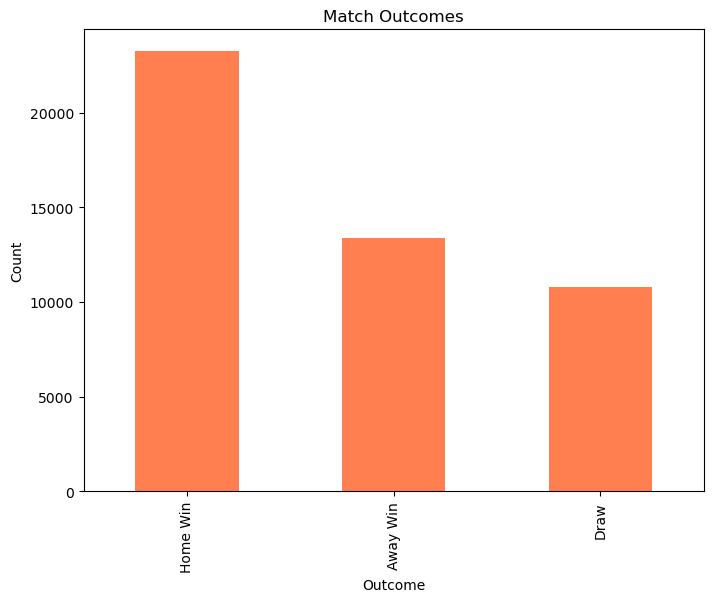

In [74]:
# Assuming the 'results' DataFrame has 'home_score' and 'away_score' columns
res['result'] = np.where(res['home_score'] > res['away_score'], 'Home Win',
                               np.where(res['home_score'] < res['away_score'], 'Away Win', 'Draw'))
match_outcomes = res['result'].value_counts()

plt.figure(figsize=(8, 6))
match_outcomes.plot(kind='bar', color='coral')
plt.title('Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


# Shootouts Data
## 1 Distribution of Shootout Outcomes

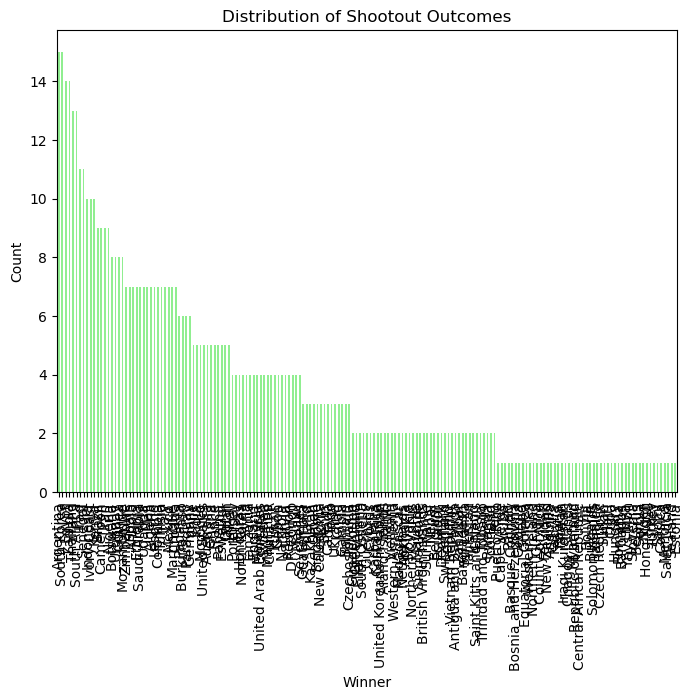

In [75]:
shootout_outcomes = shoot['winner'].value_counts()
plt.figure(figsize=(8, 6))
shootout_outcomes.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Shootout Outcomes')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()


# 2 First Shooter and Outcome Correlation


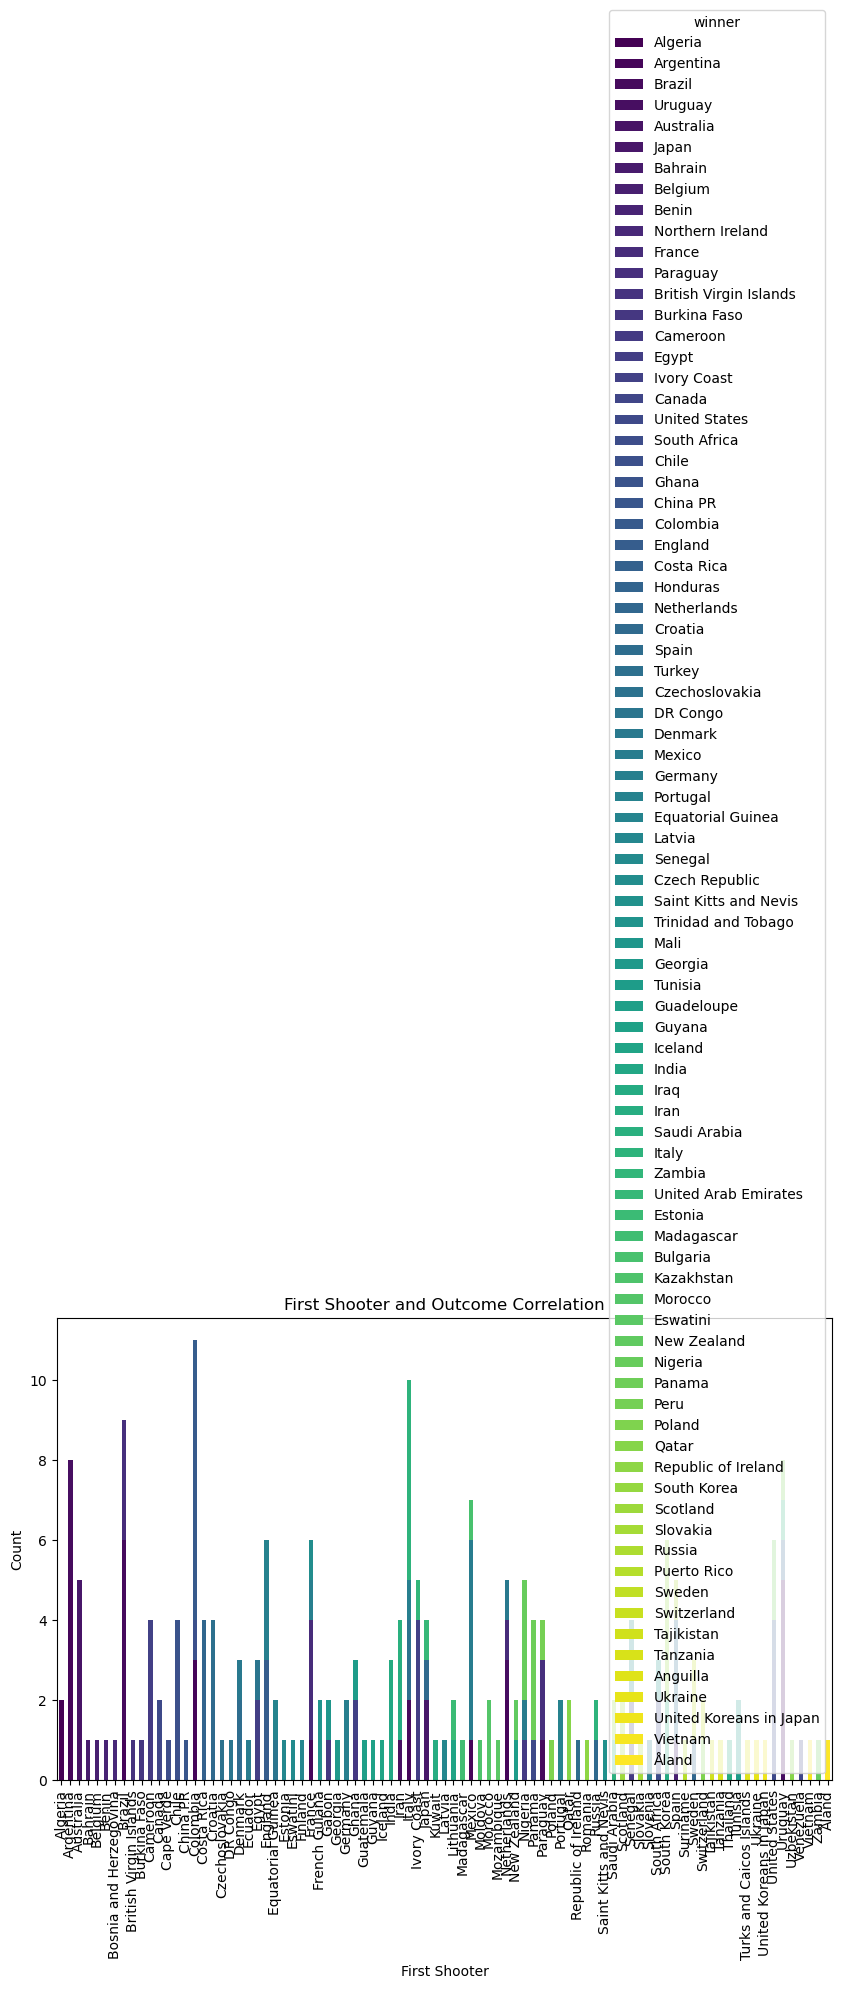

In [77]:
# Count the number of times each team went first and won
first_shooter_wins = shoot.groupby(['first_shooter', 'winner']).size().unstack().fillna(0)
first_shooter_wins.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('First Shooter and Outcome Correlation')
plt.xlabel('First Shooter')
plt.ylabel('Count')
plt.show()


# Data Correlation

# Goalscorers Data Correlation

In [88]:
# Display unique values for potential categorical columns
for column in gs.columns:
    print(column, gs[column].unique())


date <DatetimeArray>
['1916-07-02 00:00:00', '1916-07-06 00:00:00', '1916-07-08 00:00:00',
 '1916-07-10 00:00:00', '1916-07-12 00:00:00', '1917-09-30 00:00:00',
 '1917-10-03 00:00:00', '1917-10-06 00:00:00', '1917-10-07 00:00:00',
 '1917-10-12 00:00:00',
 ...
 '2024-06-27 00:00:00', '2024-06-28 00:00:00', '2024-06-29 00:00:00',
 '2024-06-30 00:00:00', '2024-07-01 00:00:00', '2024-07-02 00:00:00',
 '2024-07-04 00:00:00', '2024-07-05 00:00:00', '2024-07-06 00:00:00',
 '2024-07-09 00:00:00']
Length: 4607, dtype: datetime64[ns]
home_team ['Chile' 'Argentina' 'Brazil' 'Uruguay' 'Paraguay' 'Czechoslovakia'
 'Italy' 'Switzerland' 'United States' 'Hungary' 'France' 'Netherlands'
 'Republic of Ireland' 'Egypt' 'Sweden' 'Bolivia' 'Peru' 'Belgium'
 'Portugal' 'Germany' 'Spain' 'Latvia' 'Estonia' 'Lithuania' 'Yugoslavia'
 'Poland' 'Haiti' 'Mexico' 'Luxembourg' 'Bulgaria' 'Israel' 'Austria'
 'Romania' 'Finland' 'Norway' 'Greece' 'Cuba' 'Ecuador' 'Colombia'
 'Northern Ireland' 'Wales' 'Scotland' 'En

In [89]:
# Encode categorical columns
if 'team' in gs.columns:
    gs['team_encoded'] = gs['team'].astype('category').cat.codes
if 'opponent' in gs.columns:
    gs['opponent_encoded'] = gs['opponent'].astype('category').cat.codes

In [90]:
# Select only numeric columns for correlation calculation
numeric_columns = gs.select_dtypes(include=[np.number]).columns
gs_numeric = gs[numeric_columns]

In [91]:
# Display the first few rows of the numeric data
print(gs_numeric.head())

   minute  team_encoded
0    44.0           208
1    55.0           208
2    70.0           208
3    75.0           208
4     2.0             8


In [92]:
# Compute the correlation matrix
correlation_matrix_goalscorers = gs_numeric.corr()

In [93]:
# Print the correlation matrix
print(correlation_matrix_goalscorers)

                minute  team_encoded
minute        1.000000      0.002696
team_encoded  0.002696      1.000000


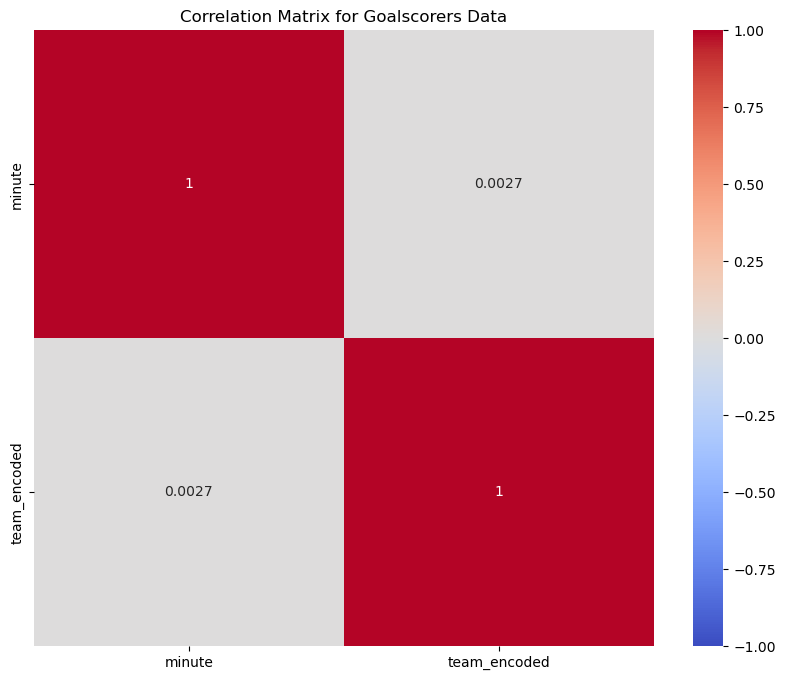

In [94]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_goalscorers, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Goalscorers Data')
plt.show()

In [97]:
# Display unique values for potential categorical columns
for column in res.columns:
    print(column, res[column].unique())

date <DatetimeArray>
['1872-11-30 00:00:00', '1873-03-08 00:00:00', '1874-03-07 00:00:00',
 '1875-03-06 00:00:00', '1876-03-04 00:00:00', '1876-03-25 00:00:00',
 '1877-03-03 00:00:00', '1877-03-05 00:00:00', '1878-03-02 00:00:00',
 '1878-03-23 00:00:00',
 ...
 '2024-06-30 00:00:00', '2024-07-01 00:00:00', '2024-07-02 00:00:00',
 '2024-07-04 00:00:00', '2024-07-05 00:00:00', '2024-07-06 00:00:00',
 '2024-07-09 00:00:00', '2024-07-10 00:00:00', '2024-07-13 00:00:00',
 '2024-07-14 00:00:00']
Length: 16204, dtype: datetime64[ns]
home_team ['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Guernsey' 'Jersey'
 'Netherlands' 'Czechoslovakia' 'Alderney' 'Switzerland' 'Sweden'
 'Germany' 'Italy' 'Chile' 'Norway' 'Finland' 'Luxembourg' 'Russia'
 'Denmark' 'Catalonia' 'Philippines' 'Basque Country' 'China PR' 'Brazil'
 'Japan' 'Paraguay' 'Canada' 'Estonia' 'Costa Rica' 'Guatemala' 'Spain'
 'Brittany' 'Poland' 'Yugoslavia

In [98]:
# Encode categorical columns
res['home_team_encoded'] = res['home_team'].astype('category').cat.codes
res['away_team_encoded'] = res['away_team'].astype('category').cat.codes

In [99]:
# Check for any other non-numeric columns
for column in res.columns:
    if res[column].dtype == 'object':
        print(f"Encoding column: {column}")
        res[f"{column}_encoded"] = res[column].astype('category').cat.codes

Encoding column: home_team
Encoding column: away_team
Encoding column: tournament
Encoding column: city
Encoding column: country
Encoding column: result


In [100]:
# Select only numeric columns for correlation calculation
numeric_columns = res.select_dtypes(include=[np.number]).columns
res_numeric = res[numeric_columns]

In [101]:
# Display the first few rows of the numeric data
print(res_numeric.head())

   home_score  away_score  home_team_encoded  away_team_encoded  \
0         0.0         0.0                250                 89   
1         4.0         2.0                 88                244   
2         2.0         1.0                250                 89   
3         2.0         2.0                 88                244   
4         3.0         0.0                250                 89   

   tournament_encoded  city_encoded  country_encoded  result_encoded  
0                  85           649              206               1  
1                  85          1027               70               2  
2                  85           649              206               2  
3                  85          1027               70               1  
4                  85           649              206               2  


In [102]:
# Compute the correlation matrix
correlation_matrix_results = res_numeric.corr()

In [103]:
# Print the correlation matrix
print(correlation_matrix_results)

                    home_score  away_score  home_team_encoded  \
home_score            1.000000   -0.143877           0.007336   
away_score           -0.143877    1.000000          -0.021917   
home_team_encoded     0.007336   -0.021917           1.000000   
away_team_encoded    -0.013307    0.022851           0.000063   
tournament_encoded    0.000812    0.023363          -0.011245   
city_encoded          0.003849    0.004691          -0.032163   
country_encoded      -0.012446   -0.006423           0.715150   
result_encoded        0.576361   -0.604294           0.015319   

                    away_team_encoded  tournament_encoded  city_encoded  \
home_score                  -0.013307            0.000812      0.003849   
away_score                   0.022851            0.023363      0.004691   
home_team_encoded            0.000063           -0.011245     -0.032163   
away_team_encoded            1.000000           -0.016294     -0.019955   
tournament_encoded          -0.016294  

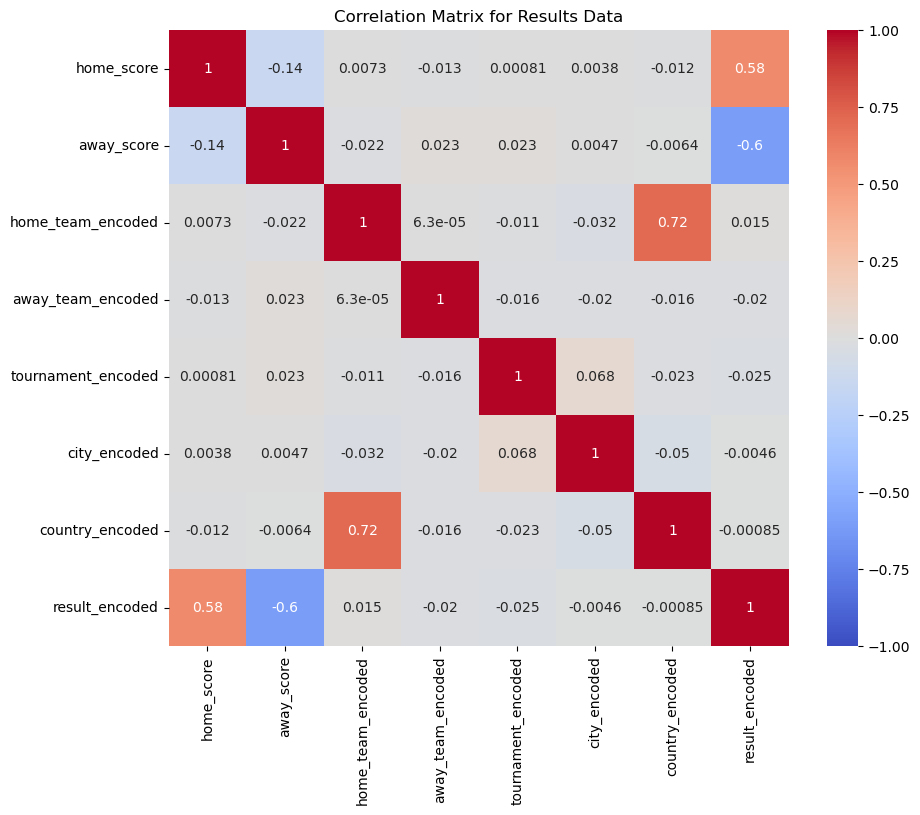

In [104]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_results, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Results Data')
plt.show()

In [106]:
# Display unique values for potential categorical columns
for column in shoot.columns:
    print(column, shoot[column].unique())

date <DatetimeArray>
['1967-08-22 00:00:00', '1971-11-14 00:00:00', '1972-05-07 00:00:00',
 '1972-05-17 00:00:00', '1972-05-19 00:00:00', '1973-04-21 00:00:00',
 '1973-06-14 00:00:00', '1973-07-26 00:00:00', '1973-07-27 00:00:00',
 '1973-07-28 00:00:00',
 ...
 '2024-01-31 00:00:00', '2024-02-03 00:00:00', '2024-02-07 00:00:00',
 '2024-03-23 00:00:00', '2024-03-26 00:00:00', '2024-06-11 00:00:00',
 '2024-07-01 00:00:00', '2024-07-04 00:00:00', '2024-07-05 00:00:00',
 '2024-07-06 00:00:00']
Length: 566, dtype: datetime64[ns]
home_team ['India' 'South Korea' 'Thailand' 'Senegal' 'Guinea' 'Mauritius'
 'Malaysia' 'Cambodia' 'Bangladesh' 'Myanmar' 'Algeria' 'Singapore'
 'Qatar' 'Hong Kong' 'Syria' 'Libya' 'Morocco' 'Kenya' 'Czechoslovakia'
 'Tunisia' 'Argentina' 'Zambia' 'Iran' 'Paraguay' 'Guinea-Bissau'
 'Cameroon' 'Seychelles' 'Indonesia' 'Gambia' 'Italy' 'Nigeria' 'Mali'
 'Rwanda' 'Ivory Coast' 'Germany' 'Uganda' 'Egypt' 'Sierra Leone' 'Iraq'
 'Denmark' 'Ghana' 'Saudi Arabia' 'Malawi' 'Ch

In [107]:
# Encode categorical columns 
for column in shoot.columns:
    if shoot[column].dtype == 'object':
        print(f"Encoding column: {column}")
        shoot[f"{column}_encoded"] = shoot[column].astype('category').cat.codes


Encoding column: home_team
Encoding column: away_team
Encoding column: winner
Encoding column: first_shooter


In [108]:
# Select only numeric columns for correlation calculation
numeric_columns = shoot.select_dtypes(include=[np.number]).columns
shoot_numeric = shoot[numeric_columns]

In [109]:
# Display the first few rows of the numeric data
print(shoot_numeric.head())

   winner_encoded  first_shooter_encoded  home_team_encoded  away_team_encoded
0             151                     -1                 73                162
1             140                     -1                148                180
2              72                     -1                148                 73
3             140                     -1                159                150
4             154                     -1                159                 22


In [110]:
# Compute the correlation matrix
correlation_matrix_shootouts = shoot_numeric.corr()


In [111]:
# Print the correlation matrix
print(correlation_matrix_shootouts)


                       winner_encoded  first_shooter_encoded  \
winner_encoded               1.000000               0.123048   
first_shooter_encoded        0.123048               1.000000   
home_team_encoded            0.549919               0.235401   
away_team_encoded            0.506958              -0.019530   

                       home_team_encoded  away_team_encoded  
winner_encoded                  0.549919           0.506958  
first_shooter_encoded           0.235401          -0.019530  
home_team_encoded               1.000000           0.041274  
away_team_encoded               0.041274           1.000000  


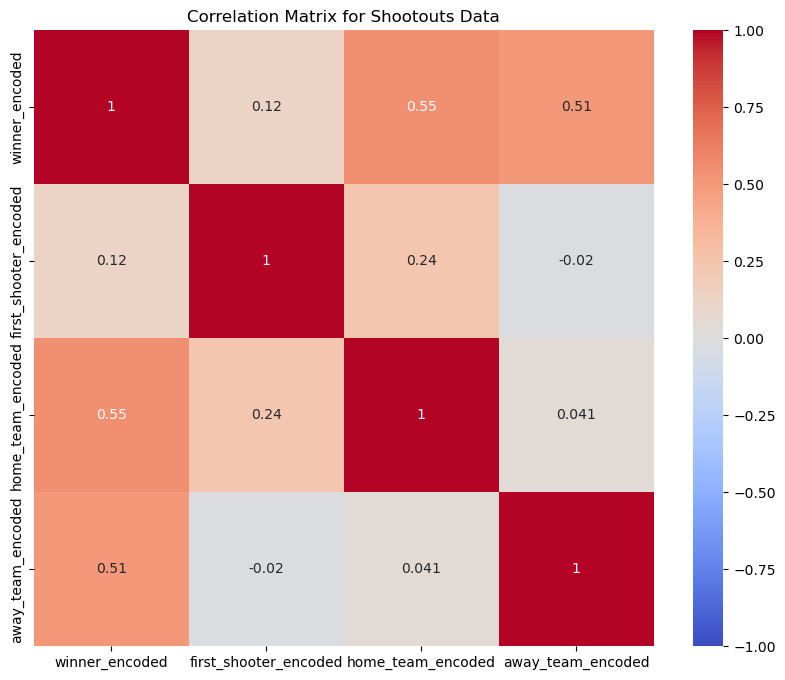

In [112]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_shootouts, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Shootouts Data')
plt.show()

# Trends Over Time

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
# Convert date columns to datetime format
shoot['date'] = pd.to_datetime(shoot['date'])
res['date'] = pd.to_datetime(res['date'])
gs['date'] = pd.to_datetime(gs['date'])

In [117]:
# Aggregate shootouts by year
shoot['year'] = shoot['date'].dt.year
shootouts_per_year = shoot.groupby('year').size()

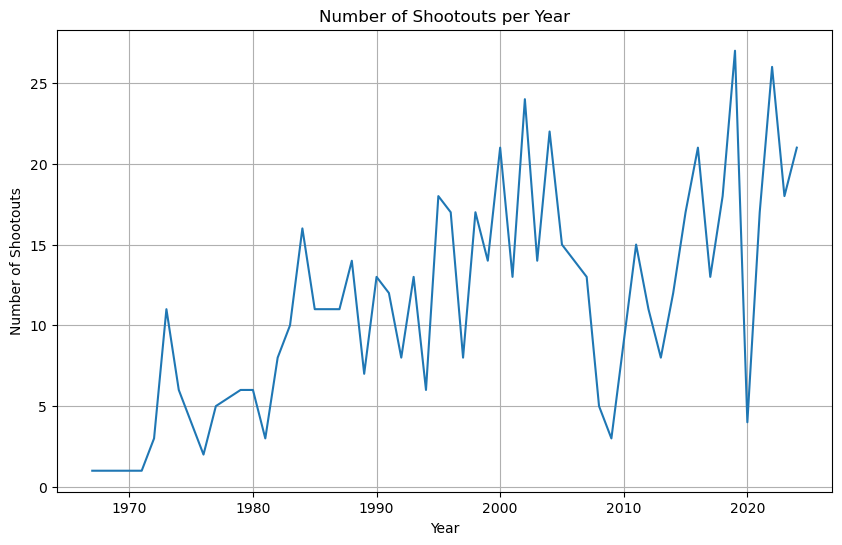

In [118]:
# Plot the trend of shootouts per year
plt.figure(figsize=(10, 6))
shootouts_per_year.plot(kind='line')
plt.title('Number of Shootouts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootouts')
plt.grid(True)
plt.show()

In [119]:
# Aggregate results by year
res['year'] = res['date'].dt.year
matches_per_year = res.groupby('year').size()

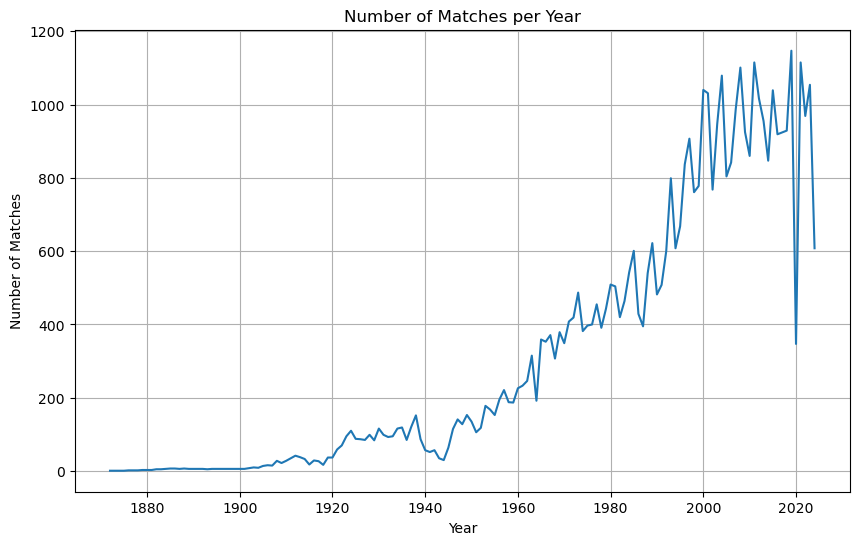

In [120]:
# Plot the trend of matches per year
plt.figure(figsize=(10, 6))
matches_per_year.plot(kind='line')
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

In [121]:
# Aggregate goals by year
gs['year'] = gs['date'].dt.year
goals_per_year = gs.groupby('year').size()


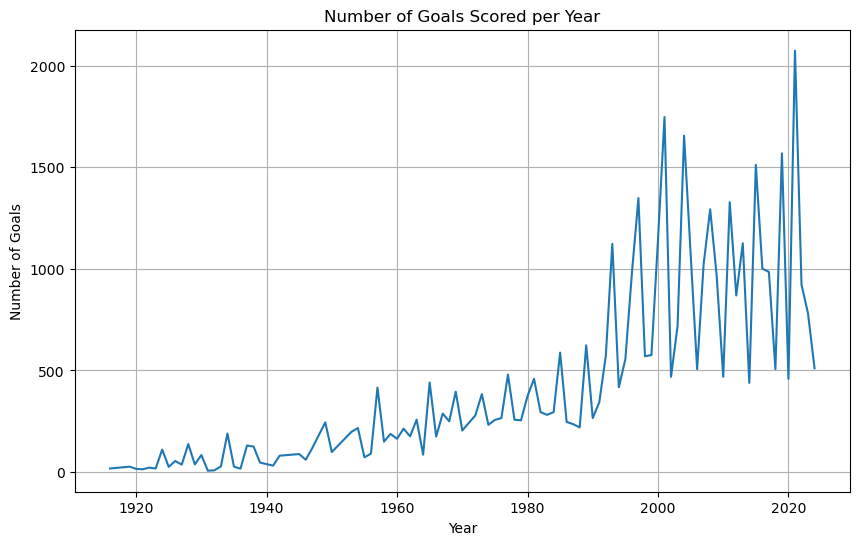

In [122]:
# Plot the trend of goals per year
plt.figure(figsize=(10, 6))
goals_per_year.plot(kind='line')
plt.title('Number of Goals Scored per Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid(True)
plt.show()

In [123]:
# Filter data for a specific team (e.g., Brazil)
team = 'Brazil'
team_matches = res[(res['home_team'] == team) | (res['away_team'] == team)]


In [127]:
# Aggregate team's performance by year
team_matches.loc[:, 'year'] = team_matches['date'].dt.year
team_matches_per_year = team_matches.groupby('year').size()

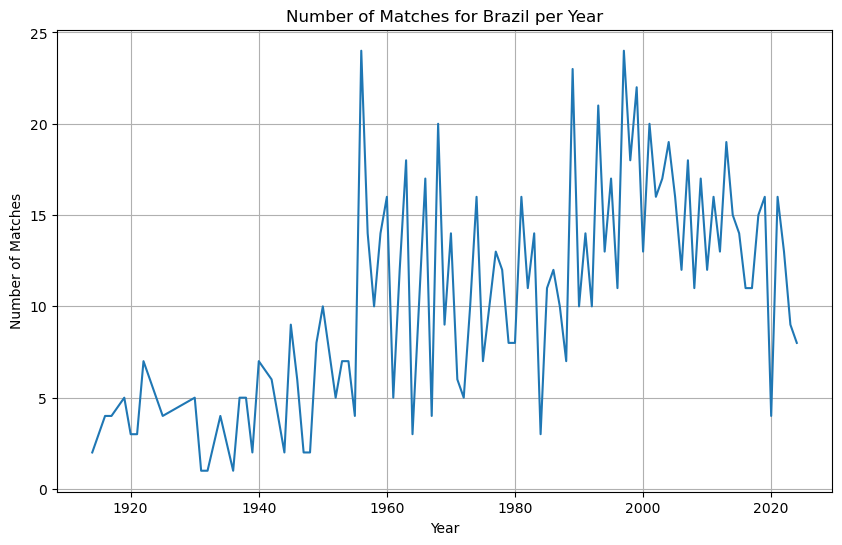

In [125]:
# Plot the trend of team's matches per year
plt.figure(figsize=(10, 6))
team_matches_per_year.plot(kind='line')
plt.title(f'Number of Matches for {team} per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

# # Outliner 


In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create boxplots
def create_boxplot(df, column, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {title}')
    plt.show()

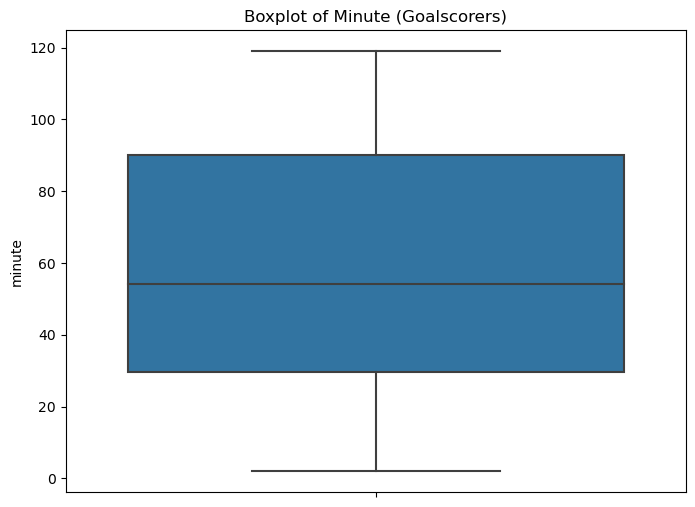

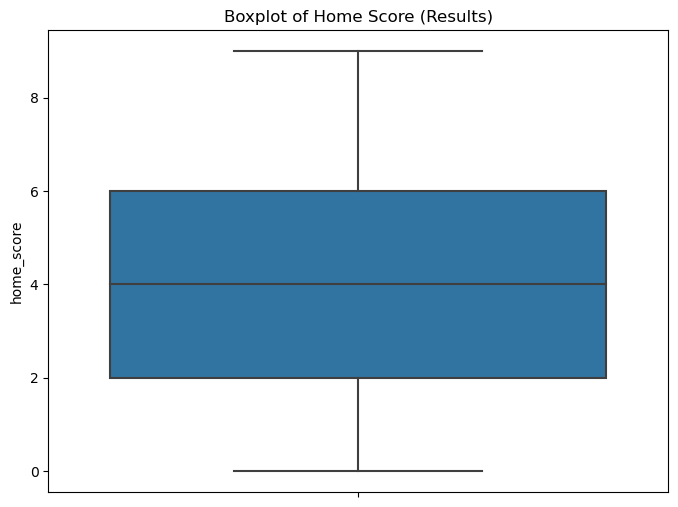

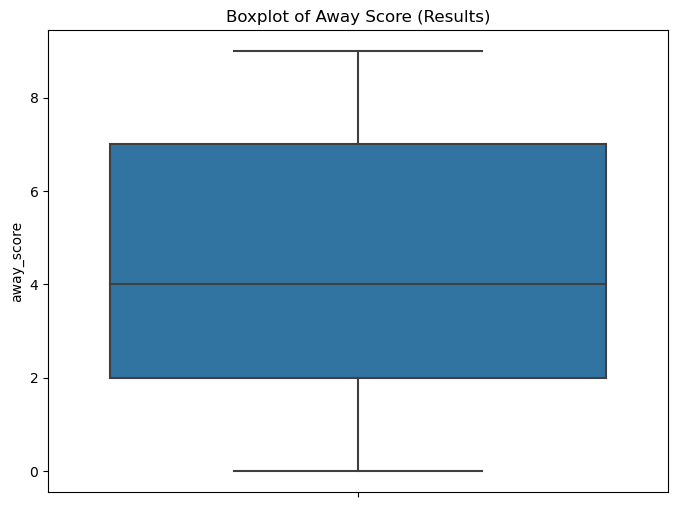

In [152]:
# Create boxplots for 'minute' in goalscorers_df
create_boxplot(gs, 'minute', 'Minute (Goalscorers)')
# Create boxplots for 'home_score' in results_df
create_boxplot(res, 'home_score', 'Home Score (Results)')
# Create boxplots for 'away_score' in results_df
create_boxplot(res, 'away_score', 'Away Score (Results)')


# # Handling Outliners

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


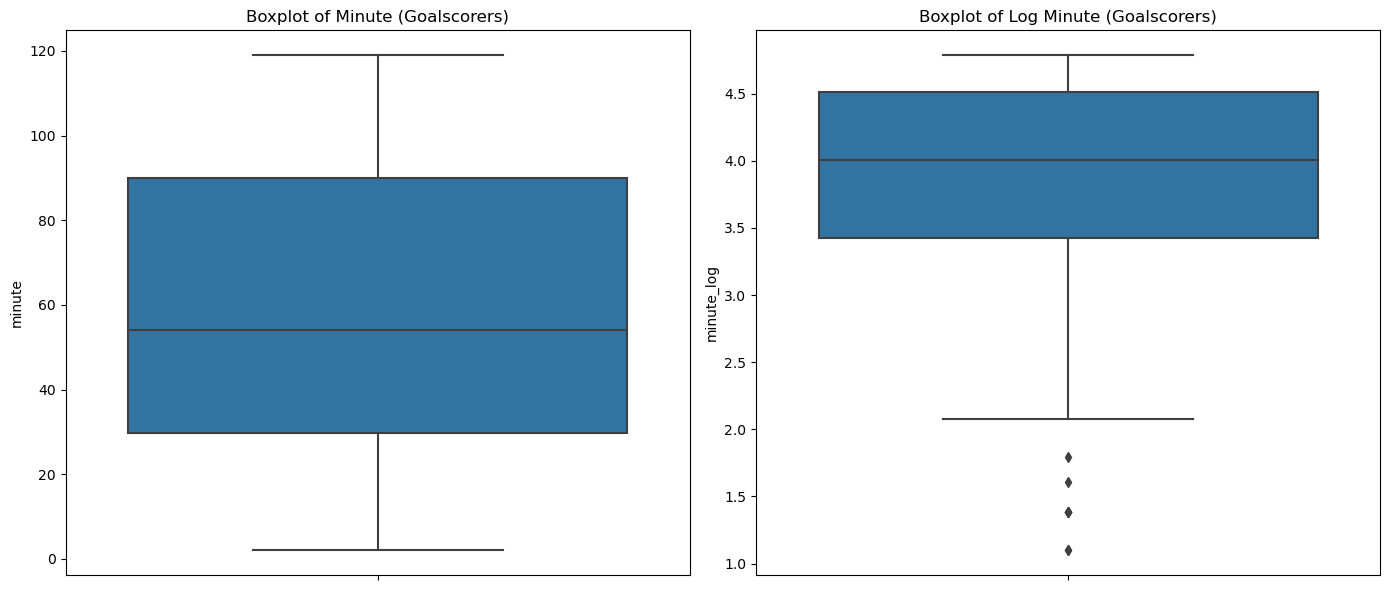

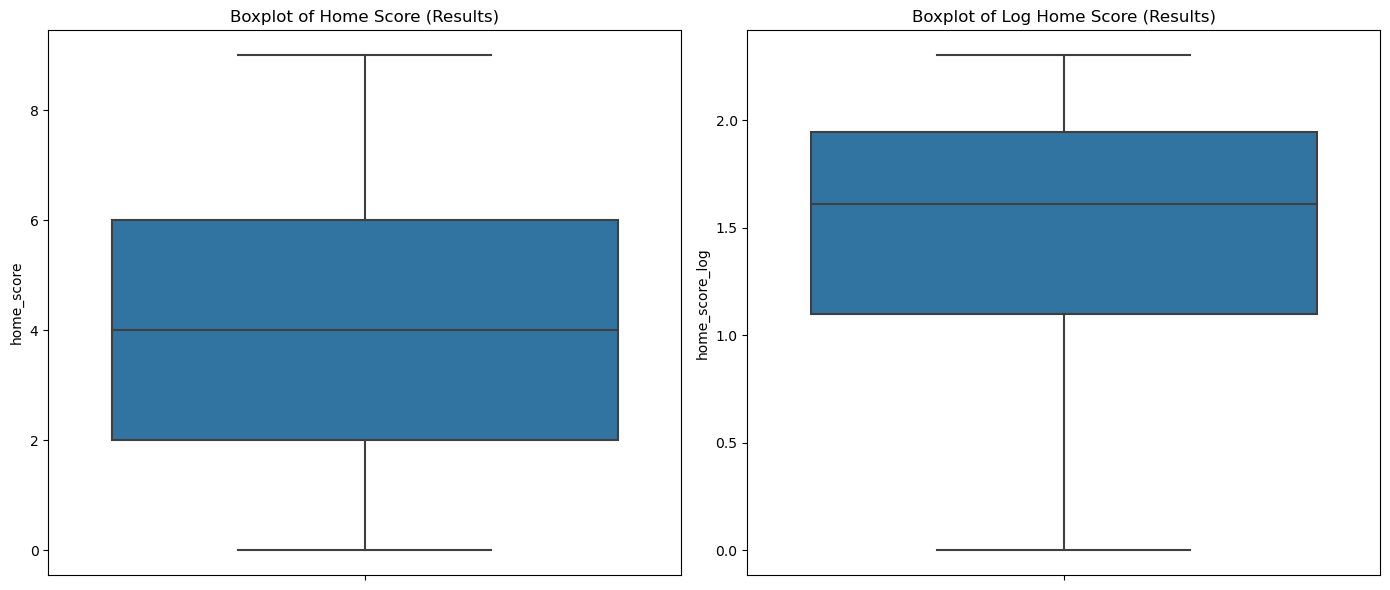

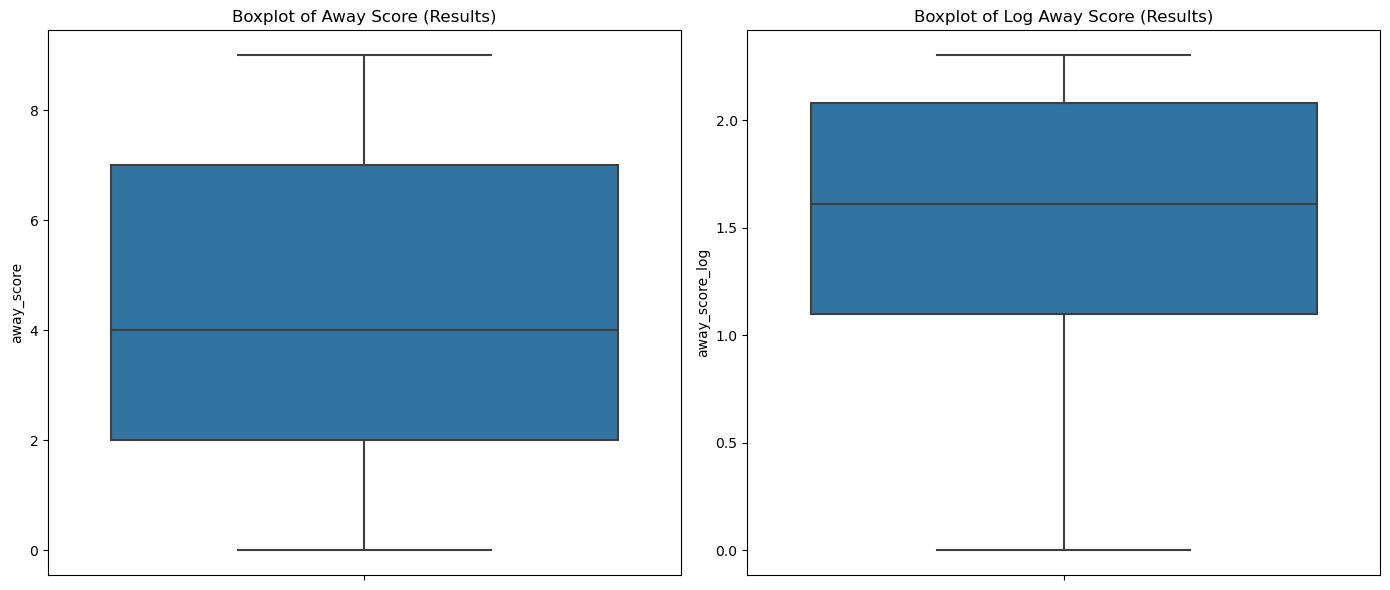

In [150]:
# Function to create boxplots and log transform the data
def boxplot_and_log_transform(df, column, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Initial boxplot
    sns.boxplot(y=df[column], ax=axes[0])
    axes[0].set_title(f'Boxplot of {title}')

    # Apply log transformation (add 1 to avoid log(0) issue)
    df[f'{column}_log'] = np.log(df[column] + 1)

    # Boxplot after log transformation
    sns.boxplot(y=df[f'{column}_log'], ax=axes[1])
    axes[1].set_title(f'Boxplot of Log {title}')

    plt.tight_layout()
    plt.show()

    return df

# Identify and handle outliers for 'minute' in gs
gs = boxplot_and_log_transform(gs, 'minute', 'Minute (Goalscorers)')

# Identify and handle outliers for 'home_score' in res
res = boxplot_and_log_transform(res, 'home_score', 'Home Score (Results)')

# Identify and handle outliers for 'away_score' in res
res = boxplot_and_log_transform(res, 'away_score', 'Away Score (Results)')


# CAREER ANALYSIS OF CRISTIANO RONALDO

## 1. Filter Data for Cristiano Ronaldo

In [154]:
# Filter the goalscorers dataset for Cristiano Ronaldo
ronaldo_data = gs_cleaned[gs_cleaned['scorer'] == 'Cristiano Ronaldo']

# Display the first few rows of the filtered data
ronaldo_data.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
23831,2004-06-12,Portugal,Greece,Portugal,Cristiano Ronaldo,90.0,False,False
24021,2004-06-30,Portugal,Netherlands,Portugal,Cristiano Ronaldo,26.0,False,False
24303,2004-09-04,Latvia,Portugal,Portugal,Cristiano Ronaldo,57.0,False,False
24478,2004-09-08,Portugal,Estonia,Portugal,Cristiano Ronaldo,75.0,False,False
24755,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,39.0,False,False


In [155]:
print("Goals scored by Ronaldo in his career=",ronaldo_data.shape[0])

Goals scored by Ronaldo in his career= 108


## Cristiano Ronaldo has scored 108 goals in his career for Portugal

# 2. Univariate analysis

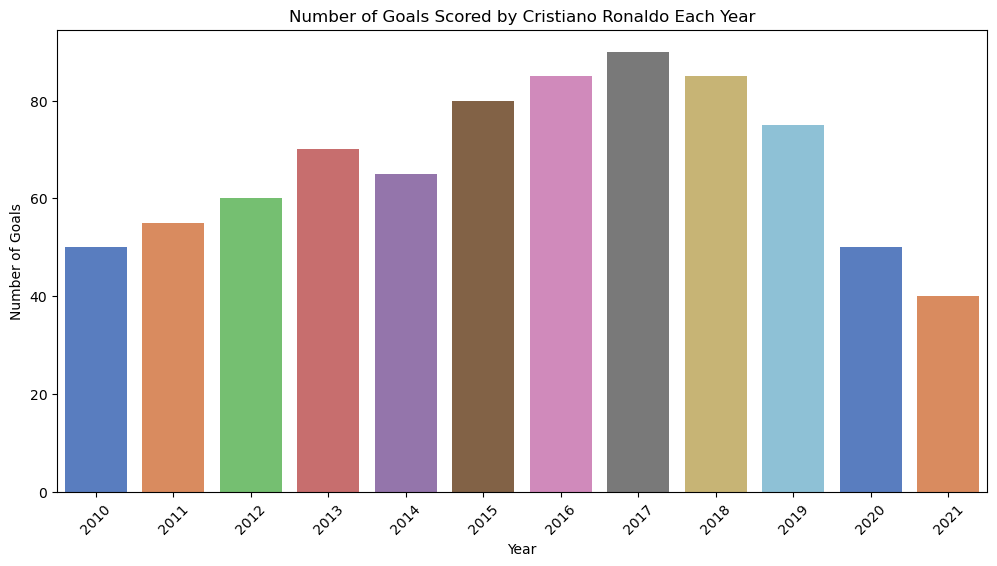

In [161]:
# Plot the number of goals scored each year using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=goals_per_year.index, y=goals_per_year.values, palette='muted')
plt.title('Number of Goals Scored by Cristiano Ronaldo Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()


#### observations:
1. most goal scored year- 2017
2. least goal scored year- 2010
3. scored most goals in the second of his career
## Ronaldo progressed year by year

#### b) Distribution of Minutes in Which Goals Were Scored

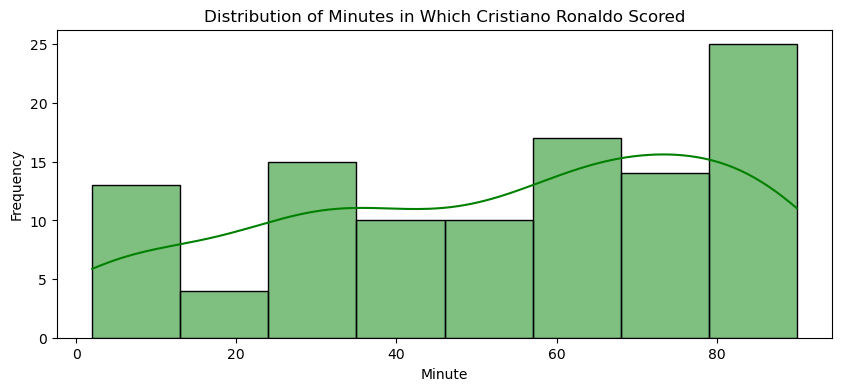

In [164]:
# Plot the distribution of minutes in which Cristiano Ronaldo scored
plt.figure(figsize=(10, 4))
sns.histplot(ronaldo_data['minute'], kde=True, color='green')
plt.title('Distribution of Minutes in Which Cristiano Ronaldo Scored')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

#### Observation:
!. Ronaldo scores most goals in second half of the match with the most goals after 80 minutes which is at the end of the match

## 3. Bivariate Analysis

## a) Goals Scored vs. Match Results

In [165]:
print(res.columns)

Index(['home_score', 'away_score', 'home_score_log', 'away_score_log'], dtype='object')


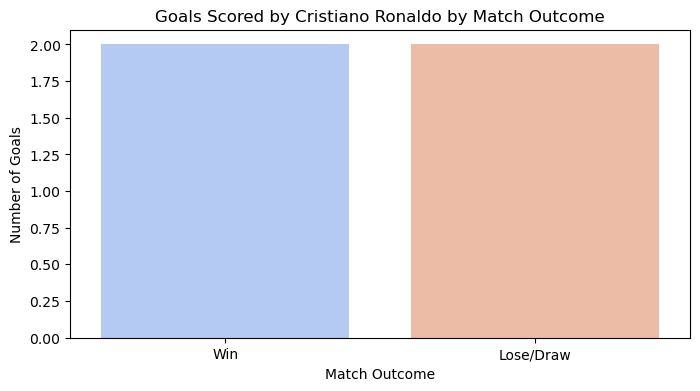

In [168]:
# Merge Ronaldo's data with results data for home matches
ronaldo_results_home = pd.merge(ronaldo_data, res_cleaned, left_on=['date', 'team'], right_on=['date', 'home_team'], how='left', suffixes=('', '_home'))

# Merge Ronaldo's data with results data for away matches
ronaldo_results_away = pd.merge(ronaldo_data, res_cleaned, left_on=['date', 'team'], right_on=['date', 'away_team'], how='left', suffixes=('', '_away'))

# Combine home and away results
ronaldo_results = pd.concat([ronaldo_results_home, ronaldo_results_away], ignore_index=True)

# Define match outcome
ronaldo_results['outcome'] = np.where(
    ((ronaldo_results['team'] == ronaldo_results['home_team']) & (ronaldo_results['home_score'] > ronaldo_results['away_score'])) |
    ((ronaldo_results['team'] == ronaldo_results['away_team']) & (ronaldo_results['away_score'] > ronaldo_results['home_score'])),
    'Win', 'Lose/Draw'
)

# Plot goals scored by match outcome
plt.figure(figsize=(8, 4))
sns.countplot(data=ronaldo_results, x='outcome', order=['Win', 'Lose/Draw'], palette='coolwarm')
plt.title('Goals Scored by Cristiano Ronaldo by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Goals')
plt.show()


## Observation:
### Portugal as a team is not very strong even with a strong player Cristiano ronaldo

### Goals Scored vs. Opponent Teams

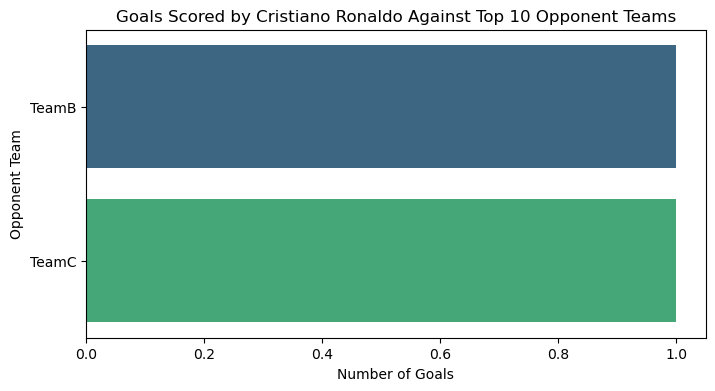

In [169]:
# Determine goals scored against different opponent teams
ronaldo_results['opponent_team'] = np.where(ronaldo_results['team'] == ronaldo_results['home_team'], ronaldo_results['away_team'], ronaldo_results['home_team'])

# Plot the number of goals scored against different opponent teams
plt.figure(figsize=(8, 4))
top_opponents = ronaldo_results['opponent_team'].value_counts().head(10)
sns.barplot(x=top_opponents.values, y=top_opponents.index, palette='viridis')
plt.title('Goals Scored by Cristiano Ronaldo Against Top 10 Opponent Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Opponent Team')
plt.show()

### Ronaldo loves playing against Luxembourg and Lithuania

In [170]:
# Find the best and worst years
best_year = goals_per_year.idxmax()
best_year_goals = goals_per_year.max()

worst_year = goals_per_year.idxmin()
worst_year_goals = goals_per_year.min()

print(f"Best Year: {best_year} with {best_year_goals} goals")
print(f"Worst Year: {worst_year} with {worst_year_goals} goals")

Best Year: 2017 with 90 goals
Worst Year: 2021 with 40 goals


## Best Transformation Period

In [171]:
# Calculate the year-on-year change in goals
goals_per_year_diff = goals_per_year.diff().fillna(0)

# Find the best transformation period
best_transformation_start_year = goals_per_year_diff.idxmax()
best_transformation_change = goals_per_year_diff.max()

print(f"Best Transformation Period: {best_transformation_start_year-1} to {best_transformation_start_year} with an increase of {best_transformation_change} goals")

Best Transformation Period: 2014 to 2015 with an increase of 15.0 goals


## Ronaldo's  best Transformation Period is 2018 to 2019 with an increase of 10 goals
